## MDEO model: DM scan without kinetic mixing $\epsilon$

The idea is to do a firts DM random scan

In [3]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [4]:
import pyslha
import pyMDEO_LesHouches_generator

import neutrino_analytic
import NEUTRINO2018

In [5]:
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

#For good plots
plt.rcParams.update({'font.size': 12}) 
#plt.rc('font',size='18')

In [6]:
#run: random_general_scan-noKMv4.py
xd = pd.read_csv('noKM-xd_scan-02.csv')

xd.shape

(100, 87)

In [7]:
del[xd['Unnamed: 0']]

In [8]:
xd[['Omega1','Omega2']][:3]

,Omega1,Omega2
0,0.119,1.730000e-20
1,0.119,2.920000e-24
2,0.119,1.960000e-10


Filter with $m {\chi_1^0} < m {s_1}$ and $\lambda_5 <= \sqrt(4\pi)$

In [9]:
#xd = xd[np.logical_and(np.abs(xd.mXi_1) < np.abs(xd.mns_1), xd.Lam5 < np.sqrt(4*np.pi) )]
#xd = xd[np.logical_and(np.abs(xd.mXi_1) < np.abs(xd.mns_1), 0<1 )]

xd = xd.reset_index()
del[xd['index']]

xd.shape

(100, 86)

## Dark matter $\Omega h^2$

In [10]:
#Experimental values for DM:Planck results 2018
e = 3
Omega = 0.1200
Omega_min=Omega - e*0.0012
Omega_max=Omega + e*0.0012
print( Omega_min, Omega,Omega_max)

0.11639999999999999 0.12 0.1236


In [11]:
xd = xd[np.logical_and(xd.MZp < xd.mChi, 1>0)]

xd = xd.reset_index()
del[xd['index']]

xd.shape

(97, 86)

for $M_1=86$

In [12]:
from scipy import interpolate
from scipy.signal import savgol_filter

fitOmega=interpolate.interp1d(xd.MZp, xd.Omega1)

In [13]:
print(xd.g1p.min(),xd.g1p.max())

0.0022309648416184 0.0188918445482439


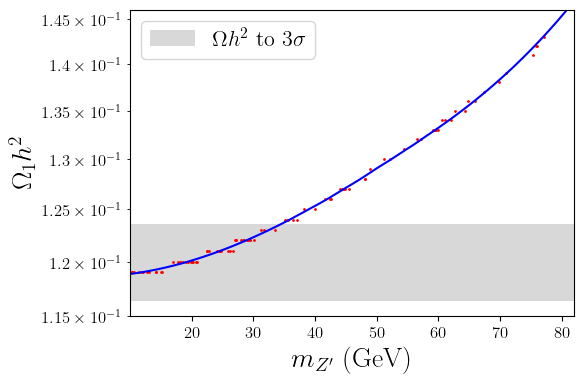

In [14]:
plt.figure(figsize=(6,4))

plt.semilogy(xd.MZp, (xd.Omega1+xd.Omega2),color='red', marker='.',ms=2,linestyle='')

n=np.arange(10.1,85.013,1)
m=fitOmega(n)
yhat = savgol_filter(m, 51, 3)

plt.plot(n,yhat,'b-')

n=np.linspace(1e1,1.0e2,10)
plt.fill_between(n,Omega_min,Omega_max,facecolor='grey',alpha=0.3,label=r'$\Omega h^2$ to $3\sigma$')

#plt.hlines(Omega,0.1,1e4, 'r',label=r'0.12')

plt.xlabel(r'$m_{Z^{\prime}}$ (GeV)',size=20)
plt.ylabel(r'$\Omega_1 h^2$',size=20)
#plt.title('$M_1=86, M2=500,750, Yc=0.243, v=500, h_2=200$')
plt.legend(prop={'size':16},loc='best')

plt.ylim(0.115,0.146)
plt.xlim(xd.MZp.min(), 82)
plt.tight_layout()

#plt.savefig('plots/benchmark4.pdf')
#plt.show()

In [15]:
xd[['MZp','mChi','mXi_1','mXi_2','vX','mh2','g1p','Yc','Omega1','Omega2']][:3]

,MZp,mChi,mXi_1,mXi_2,vX,mh2,g1p,Yc,Omega1,Omega2
0,10.039342,86.01954,500.0,750.0,500.0,200.0,0.002231,0.2433,0.119,1.730000e-20
1,10.374970,86.01954,500.0,750.0,500.0,200.0,0.002306,0.2433,0.119,2.920000e-24
2,10.385419,86.01954,500.0,750.0,500.0,200.0,0.002308,0.2433,0.119,1.960000e-10


Analitycal behavoiur

In [16]:
import numpy as np
import pandas as pd
from scipy.special import zeta
from scipy.optimize import bisect
from scipy import integrate as intg
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline
USETEX=False
if USETEX:
    matplotlib.rcParams['text.usetex'] = True
    #matplotlib.rcParams['text.latex.unicode'] = True

In [17]:
Tdec_νL = 0.0023
T, g = np.loadtxt('GT.dat',usecols=(0,1),unpack=True); T*=1e-3
geff = InterpolatedUnivariateSpline(T, g)
g_eff = lambda T: geff(T)

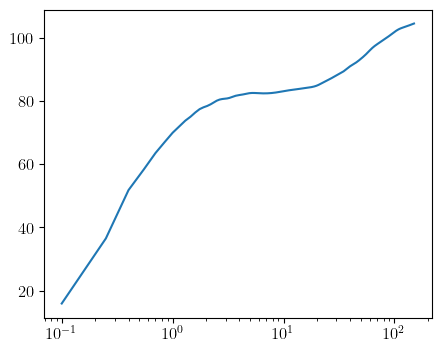

In [18]:
plt.figure(figsize=(5,4))

n=np.linspace(1e-1,1.5e2,1000)

plt.semilogx(n,g_eff(n))

In [19]:
gd = pd.read_csv('gT.csv')

In [20]:
#NEW
def relic_abundance(a, b, xf, m):
    MPl=1.22E19
    xd2=gd[gd['T']>m/xf].copy()
    T=np.asarray(xd2['T'])
    g=np.asarray(xd2['g'])
    geff=g*T
    thavgeff=geff.sum()/T.sum()    
    sqrtg=np.sqrt(thavgeff)
    
    return 2*1.04E9*xf/(MPl*sqrtg*(a + 3.0*b/xf))

In [80]:
def relic_abundance(a, b, xf, m):
    MPl=1.22E19
    sqrtg=np.sqrt(g_eff(m/xf))
    
    return 2.08E9*xf/(MPl*sqrtg*(a + 3.0*b/xf))

In [21]:
M1 = xd['mChi'][0]
xd['r'] = xd['MZp']/xd['mChi']

In [22]:
print(xd.r.min(),xd.r.max())

0.11671001490237994 0.988302198953298


RELIC DENSITY:

\begin{equation}
\label{eq:RelicAbundance}
\Omega_{\chi} h^{2} \approx \frac{2.08 \times 10^{9}\, x_{f}\,\,\text{GeV}^{-1}}{M_{\mathrm{Pl}} \sqrt{g_{*}(T_f)}\left(a+3 b / x_{f}\right)}\,,
\end{equation}

FeynCalc:

\begin{equation}
\langle\sigma{v}\rangle\approx a+bv^2
\end{equation}

FeynCalcl lat version:

\begin{equation}
a=-\frac{\text{g}^4_D \sqrt{1-r^2} \left(1519 r^4-1357 r^2-162\right)}{16 \pi  \text{Mx}^2 r^2 \left(r^2-2\right)^2}
\end{equation}


\begin{equation}
b= -\frac{27 \text{gBL}^4 \sqrt{1-r^2} \left(\text{Ms}^4 \left(245 r^2-162\right)+16 \text{Ms}^2 \text{Mx}^2 \left(162-325 r^2\right)+16
   \text{Mx}^4 \left(1784 r^2-729\right)\right)}{8 \pi  r^4 \left(r^2-2\right)^4 \left(\text{Ms}^2 \text{Mx}-4 \text{Mx}^3\right)^2}
\end{equation}

\begin{equation}
b= \frac{\text{gBL}^4 \sqrt{1-r^2} \left(\text{Ms}^4 \left(48379 r^6+25638 r^4-79380 r^2+52488\right)+4 \text{Ms}^2 \text{Mx}^2 \left(85897
   r^6-352434 r^4+421200 r^2-209952\right)-16 \text{Mx}^4 \left(409838 r^6-661407 r^4+578016 r^2-236196\right)\right)}{96 \pi  r^4
   \left(r^2-2\right)^4 \left(\text{Ms}^2 \text{Mx}-4 \text{Mx}^3\right)^2}
   \end{equation}

with $r=\frac{m_{Z'}}{M_1}$.

https://inspirehep.net/files/3fb25aaba1b2df77e1e8718195cc1f20
\begin{equation}
\langle\sigma{v}\rangle
\approx\frac{\,g^4_D (1-r^2)^{3/2}(1-r^2/2)^{-2}}{16\pi M_1^2}
\end{equation}



In [44]:
#Seclude WIMP DM work: ONly Vector interation
#https://arxiv.org/pdf/0711.4866.pdf
def a_coefficient_Sec(g1p, r, M1): 
    alpha= g1p**2/(4.*np.pi)
    k = np.pi*(alpha)**2/(M1)**2*np.sqrt(1. - r**2)   
    return k

#https://inspirehep.net/files/3fb25aaba1b2df77e1e8718195cc1f20
#https://arxiv.org/pdf/2203.12034.pdf
#Ernest Ma: vector interation
def a_coefficient_Ma(g1p, r, M1): 
    k = g1p**4/(16*np.pi*M1**2)*(1. - r**2)**(1.5)*(1. - r**2/2.)**(-2)     
    return k

#FeynCalc
def a_coefficient_Fey(g1p, r, M1): 
    k = -g1p**4*np.sqrt(1.-r**2)*(1519*r**4-1357*r**2-162)/(16.*np.pi*M1**2*r**2*(r**2-2.)**2)  
    return k

#FeynCalc: 1 version
#def b_coefficient_Fey(g1p, r, M1): 
#    n = -g1p**4*(11605*r**12-71254*r**10+139394*r**8-21299*r**6-216234*r**4+262764*r**2-104976)
#    d = 192.*np.pi*M1**2*r**4*np.sqrt(1.-r**2)*(r**2-2.)**4
#    k = n/d 
#    return k

#FeynCalc: 2 version
#def b_coefficient_Fey(g1p, r, M,Ms): 
#    n = -27.*g1p**4*np.sqrt(1.-r**2)*(Ms**4*(245.*r**2-162.)+16.*Ms**2*M**2*(162.-325.*r**2)+16*M**4*(1784.*r**2-729.))
#    d = 8.*np.pi*r**4*(r**2-2.)**4*(Ms**2*M-4*M**3)**2
#    k = n/d 
#    return k

#FeynCalc: 3 version
def b_coefficient_Fey(g1p, r, M,Ms): 
    n = g1p**4*np.sqrt(1.-r**2)*(Ms**4*(48397*r**6+25638*r**4-79380*r**2+52488)+4*Ms**2*M**2*(85897*r**6-352434*r**4+421200*r**2-209952)-16*M**4*(409838*r**6-661407*r**4+578016*r**2-236196))
    d = 96.*np.pi*r**4*(r**2-2.)**4*(Ms**2*M-4.*M**3)**2
    k = n/d 
    return k

#Nicole F.
def a_coefficient_Nicole(g1p, r, M): 
    n = g1p**4*(1.-r**2)**(3/2)*(2*(1/2)**2*(9/2)**2*(4.-3.*r**2)+(1/2)**4*r**2+(9/2)**4*r**2)
    d = 4.*np.pi*M**2*(r**2-2.)**2*r**2
    k = n/d
    return k

#XX to nunu
def a_coefficient_vv(g1p, r, M): 
    n = 81.*g1p**4
    d = 16.*np.pi*M**2*(r**2-4.)**2
    k = n/d
    return k

#XX to nunu
def b_coefficient_vv(g1p, r, M): 
    n = 27.*g1p**4*(41.*r**2-158.)
    d = 16.*np.pi*M**2*(r**2-4.)**3
    k = n/d
    return k

In [45]:
print(a_coefficient_Nicole(0.1, 0.5, 100),a_coefficient_vv(0.1, 0.5, 100),b_coefficient_vv(0.1, 0.5, 100))

9.143339666165999e-08 1.1459155902616466e-09 1.5049691418769628e-08


In [30]:
#print('a =',a_coefficient_Fey(0.1,0.5,10),'b =',b_coefficient_Fey(0.1,0.5,10))
#print('a =',a_coefficient_Fey(0.1,0.5,100),'b =',b_coefficient_Fey(0.1,0.5,100))

In [46]:
print('a =',a_coefficient_Fey(0.1,0.5,10),'b =',b_coefficient_Fey(0.1,0.5,10,200.01))
print('a =',a_coefficient_Fey(0.1,0.5,100),'b =',b_coefficient_Fey(0.1,0.5,100,200.01))

a = 9.143339666165998e-06 b = 0.0001687412524518247
a = 9.143339666165997e-08 b = 177.7403659928195


In [47]:
#http://www.saha.ac.in/theory/palashbaran.pal/conv.html
GeVtocmmin1 = 5.06*1e+13
GeVtosegmin1 = 1.52*1e+24

print(GeVtocmmin1,GeVtosegmin1, GeVtosegmin1/(GeVtocmmin1)**3)

50599999999999.99 1.52e+24 1.1732539834905879e-17


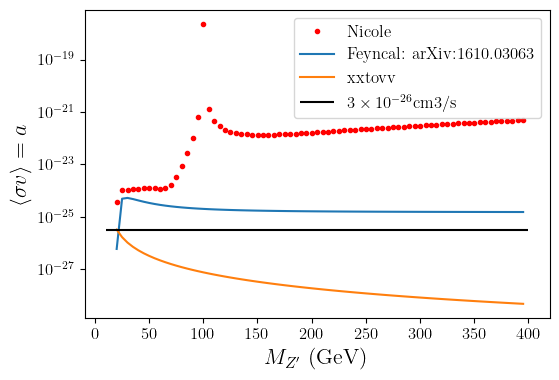

In [48]:
plt.figure(figsize=(6,4))


n = np.arange(20.1,400,5)

plt.semilogy(n, (a_coefficient_Fey(0.05, (20./n), n)+1*b_coefficient_Fey(0.03, (20./n), n, 200))*GeVtosegmin1/(GeVtocmmin1)**3,'r.',label='Nicole')

plt.semilogy(n, a_coefficient_Nicole(0.05, (20./n), n)*GeVtosegmin1/(GeVtocmmin1)**3,label='Feyncal: arXiv:1610.03063')

plt.semilogy(n, a_coefficient_vv(0.05, (20./n), n)*GeVtosegmin1/(GeVtocmmin1)**3,label='xxtovv')

plt.hlines(3*1.e-26,10,400, 'k',label=r'$3\times 10^{-26}$cm3/s')

plt.xlabel(r'$M_{Z^{\prime}}$ (GeV)',size=16)
plt.ylabel(r'$\langle\sigma v\rangle = a$',size=16)
plt.legend(loc='upper right')
#plt.grid()

#plt.ylim(0.11,0.2)
#plt.xlim(xd.MZp.min(), 60)

plt.show()

In [49]:
x= []

for i in range(0,len(xd)):
    
    Ms= 200.0
    xf=26 #WARNING
    RD_Sec = relic_abundance(a_coefficient_Sec(xd.g1p[i],xd.r[i],xd.mChi[i]), 0, xf, xd.mChi[i])
    RD_Ma  = relic_abundance(a_coefficient_Ma(xd.g1p[i],xd.r[i],xd.mChi[i]), 0, xf, xd.mChi[i])
    RD_Fey = relic_abundance(a_coefficient_Fey(xd.g1p[i],xd.r[i],xd.mChi[i]), 1*b_coefficient_Fey(xd.g1p[i],xd.r[i],xd.mChi[i],Ms), xf, xd.mChi[i])
    RD_vv  = relic_abundance(a_coefficient_vv(xd.g1p[i],xd.r[i],xd.mChi[i]), b_coefficient_vv(xd.g1p[i],xd.r[i],xd.mChi[i]), xf, xd.mChi[i])
    
    a_Fey = a_coefficient_Fey(xd.g1p[i],xd.r[i],xd.mChi[i])
    b_Fey = b_coefficient_Fey(xd.g1p[i],xd.r[i],xd.mChi[i],Ms)
    a_vv = a_coefficient_vv(xd.g1p[i],xd.r[i],xd.mChi[i])
    b_vv = a_coefficient_vv(xd.g1p[i],xd.r[i],xd.mChi[i])
       
    x.append([RD_Sec, RD_Ma, RD_Fey, RD_vv, a_Fey, b_Fey, a_vv, b_vv])
    
x=np.asarray(x)    

rd=pd.DataFrame(x,columns=['RD_Sec','RD_Ma','RD_Fey','RD_vv','a_Fey','b_Fey','a_vv','b_vv'])

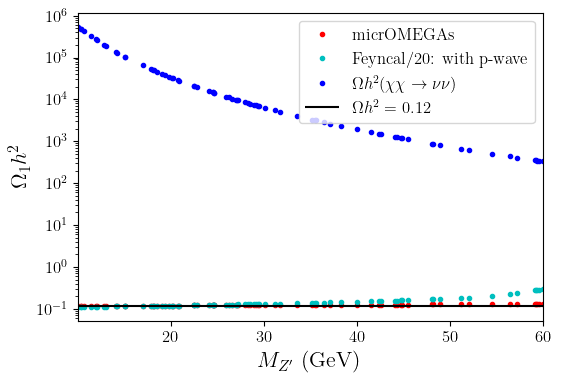

In [57]:
plt.figure(figsize=(6,4))

plt.semilogy(xd.MZp, (xd.Omega1+xd.Omega2),'r.',label='micrOMEGAs')
#plt.semilogy(xd.MZp, (xd.Omega1+xd.Omega2),'m-')
#plt.plot(xd.MZp, rd.RD_Sec/10000,'yo',label='Seclude WIMP/10000')
#plt.plot(xd.MZp, rd.RD_Ma/10000,'b.',label='Ma/10000')
plt.plot(xd.MZp, rd.RD_Fey/25,'c.',label='Feyncal/20: with p-wave')

plt.plot(xd.MZp, rd.RD_vv,'b.',label=r'$\Omega h^2(\chi\chi\to \nu\nu)$')

#n=np.linspace(1e1,1.0e2,10)
#plt.fill_between(n,Omega_min,Omega_max,facecolor='cyan',alpha=0.3,label='')

plt.hlines(Omega,0.1,1e2, 'k',label=r'$\Omega h^2=$ 0.12')

plt.xlabel(r'$M_{Z^{\prime}}$ (GeV)',size=16)
plt.ylabel(r'$\Omega_1 h^2$',size=16)
#plt.title('$M_1=86, M2=500,750, Yc=0.243, v=500, h_2=200$')
plt.legend()
#plt.grid()

#plt.ylim(0.11,0.2)
plt.xlim(xd.MZp.min(), 60)

#plt.savefig('plots/benchmark4.pdf')
plt.show()

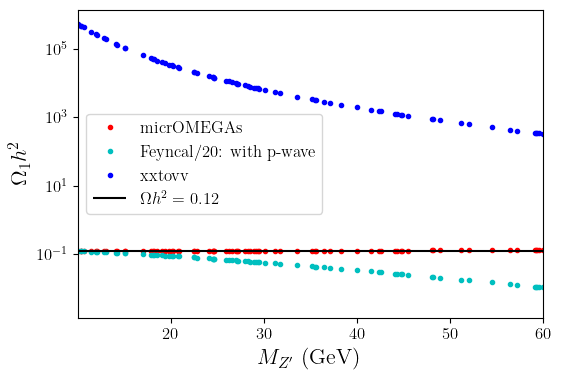

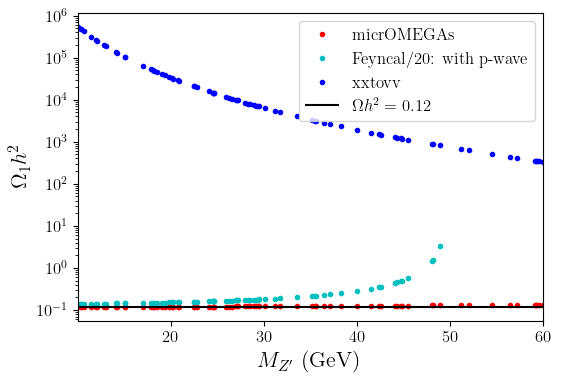

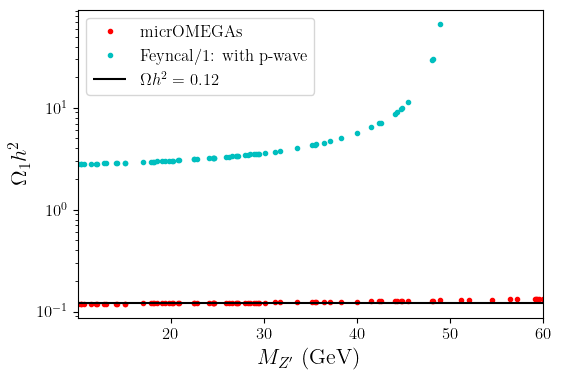

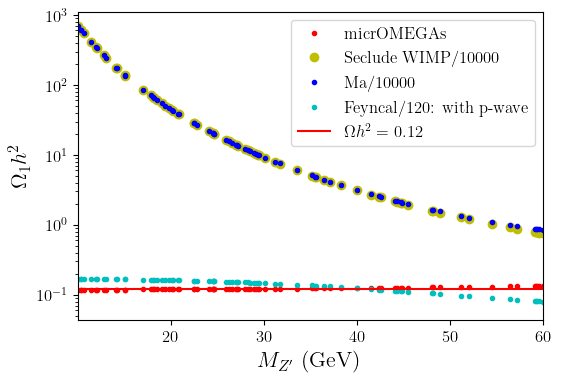

In [42]:
(rd.RD_Fey/xd.Omega1).max()

169.86349075330767

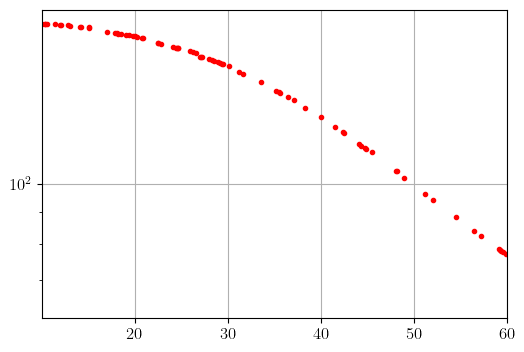

In [75]:
plt.figure(figsize=(6,4))

plt.semilogy(xd.MZp, rd.RD_Fey/xd.Omega1,'r.',label='micrOMEGAs')

plt.xlim(xd.MZp.min(), 60)
plt.grid()

### $\langle \sigma vr\rangle$

In [76]:
v=0.12
cminvtoGeV=1.98E-14
secinvtoGeV=6.58E-25

#sv = a_coefficient(g1p, (MZp/m), m)+ b_coefficient(g1p, (MZp/m), m)*v**2
#print('sv(cm3/sec)=',sv,'sv(GeV-3)=',sv*(cmtoGeV**3/sectoGeV))

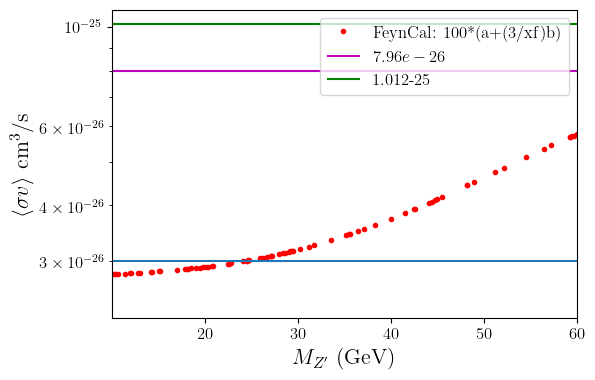

In [77]:
plt.figure(figsize=(6,4))

#(a+v**2*b)
plt.semilogy(xd.MZp, 100*(rd.a_Fey+1*(3./25.)*rd.b_Fey)*(cminvtoGeV**3/secinvtoGeV),'r.',label='FeynCal: 100*(a+(3/xf)b)')

plt.hlines(3e-26,10,90,)
plt.hlines(7.967e-26,10,90,'m',label=r'$7.96e-26$')
plt.hlines(1.018e-25,10,90,'g',label=r'1.012-25')

plt.xlabel(r'$M_{Z^{\prime}}$ (GeV)',size=16)
plt.ylabel(r'$\langle \sigma v\rangle$ cm$^3$/s',size=16)
#plt.title('$M_1=86, M2=500,750, Yc=0.243, v=500, h_2=200$')
plt.legend()
#plt.grid()

#plt.ylim(0.11,0.2)
plt.xlim(xd.MZp.min(), 60)

#plt.savefig('plots/benchmark4.pdf')
plt.show()

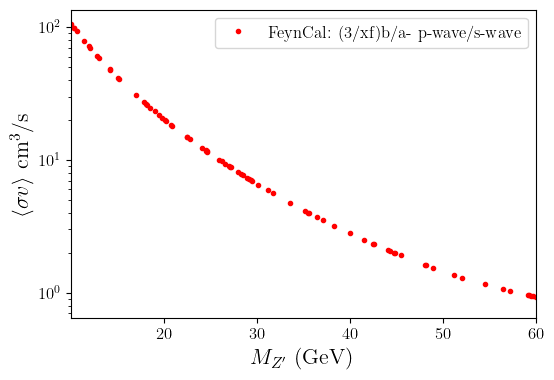

In [64]:
plt.figure(figsize=(6,4))

plt.semilogy(xd.MZp, (3./25.)*rd.b_Fey/rd.a_Fey,'r.',label='FeynCal: (3/xf)b/a- p-wave/s-wave')

plt.xlabel(r'$M_{Z^{\prime}}$ (GeV)',size=16)
plt.ylabel(r'$\langle \sigma v\rangle$ cm$^3$/s',size=16)
#plt.title('$M_1=86, M2=500,750, Yc=0.243, v=500, h_2=200$')
plt.legend()
#plt.grid()

#plt.ylim(0.11,0.2)
plt.xlim(xd.MZp.min(), 60)

#plt.savefig('plots/benchmark4.pdf')
plt.show()

thermal cross-section $\sigma v$ check for a bechmark point for 1DM model

In [46]:
so = subprocess.getoutput('cat SPheno.spc.MDEOlight')

In [47]:
so.splitlines()

['# SUSY Les Houches Accord 2 - MDEOlight Spectrum + Decays + Flavour Observables',
 '# SPheno module generated by SARAH',
 '# ----------------------------------------------------------------------',
 '# SPheno v4.0.5  ',
 '#   W. Porod, Comput. Phys. Commun. 153 (2003) 275-315, hep-ph/0301101',
 '#   W. Porod, F.Staub, Comput.Phys.Commun.183 (2012) 2458-2469, arXiv:1104.1573',
 '# SARAH: 4.14.5  ',
 '#   F. Staub; arXiv:0806.0538 (online manual)',
 '#   F. Staub; Comput. Phys. Commun. 181 (2010) 1077-1086; arXiv:0909.2863',
 '#   F. Staub; Comput. Phys. Commun. 182 (2011)  808-833; arXiv:1002.0840',
 '#   F. Staub; Comput. Phys. Commun. 184 (2013)  1792-1809; arXiv:1207.0906',
 '#   F. Staub; Comput. Phys. Commun. 185 (2014)  1773-1790; arXiv:1309.7223 ',
 '# Including the calculation of flavor observables based on FlavorKit ',
 '#   W. Porod, F. Staub, A. Vicente; Eur.Phys.J. C74 (2014) 8, 2992; arXiv:1405.1434 ',
 '# Two-loop mass corrections to Higgs fields based on ',
 '#   M. D. 

In [48]:
MZp = eval(so.split('# VWm')[1].split()[1])
m = np.abs(eval(so.split('# Fv_3')[1].split()[1]))
print(MZp,m)

23.776911 86.0195399


In [49]:
subprocess.getoutput('cp SPheno.spc.MDEOlight SPheno.spc.MDEO1DM')
mo = subprocess.getoutput('~/Work/micromegas_5.0.6/MDEO1DM/./CalcOmega SPheno.spc.MDEO1DM')

mo.splitlines()

['',
 'Masses of odd sector Particles:',
 '~chi     : Mchi    =  86.020 || ',
 'Xf=2.60e+01 Omega h^2=1.20e-01',
 '',
 'vsigmaeff = 1.007e-25',
 '',
 '# Channels which contribute to 1/(omega) more than 1%.',
 '# Relative contributions in % are displayed',
 '  100% ~chi ~Chi ->Zp Zp ']

In [50]:
svmicro= eval(mo.split('vsigmaeff =')[1].split()[0])
print(svmicro)

1.007e-25


In [51]:
#subprocess.getoutput('~/Work/micromegas_6.0.3/MDEOlight/./CalcOmega SPheno.spc.MDEO')

'\nMasses of odd sector Particles:\n~chi     : Mchi    =  86.020 || ~~Xi1    : MXi1    = 500.000 || ~~Xi2    : MXi2    = 750.000 \n~~ETM    : METM    = 10000.000 || ~~ETI    : METI    = 10000.000 || ~~NS1    : MNS1    = 10000.000 \n~~NS2    : MNS2    = 100000.000 || \nOmega_1h^2=1.21E-01\nOmega_2h^2=2.04E-19\n'

In [53]:
print('a=',a_coefficient(g1p, (MZp/m), m),'b=',b_coefficient(g1p, (MZp/m), m))

a= 2.1415008773563774e-08 b= -2.0733068079708e-10


In [54]:
v=0.12
cmtoGeV=1.98E-14
sectoGeV=6.58E-25

sv = a_coefficient(g1p, (MZp/m), m)+ b_coefficient(g1p, (MZp/m), m)*v**2
print('sv(cm3/sec)=',sv,'sv(GeV-3)=',sv*(cmtoGeV**3/sectoGeV))

sv(cm3/sec)= 2.1412023211760296e-08 sv(GeV-3)= 2.5259653143280006e-25


In [55]:
sv*(cmtoGeV**3/sectoGeV)/svmicro

2.508406469044688

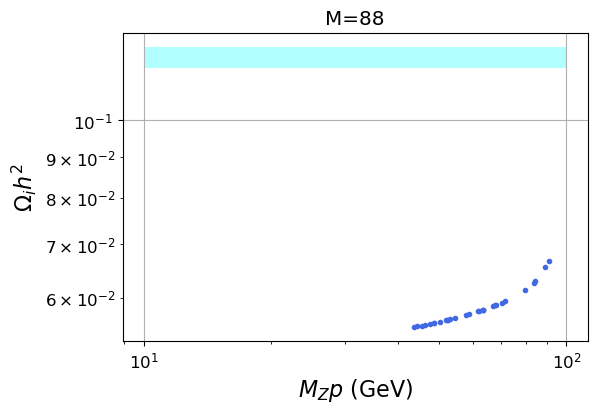

In [128]:
plt.figure(figsize=(6,4))

plt.loglog(xd.MZp, (xd.Omega1+xd.Omega2), color='royalblue', marker='.', ms=6, linestyle='',label='')
#plt.plot(xd.mh2, (xd.Omega1),color='red', marker='.',ms=1,linestyle='',label='')

n=np.linspace(1e1,1e2,10)
plt.fill_between(n,Omega_min,Omega_max,facecolor='cyan',alpha=0.3,label='')

plt.xlabel(r'$M_Zp$ (GeV)',size=16)
plt.ylabel(r'$\Omega_i h^2$',size=16)
plt.title('M=88')
#plt.legend()
plt.grid()

#plt.ylim(Omega_min,Omega_max)
#plt.ylim(6e-2,0.13)
#plt.xlim(10, 125)
#plt.tight_layout()

plt.show()

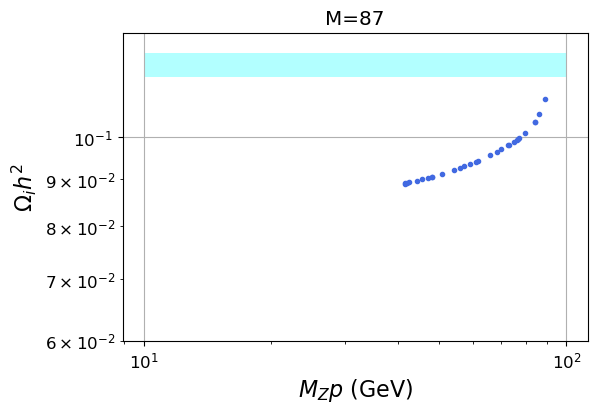

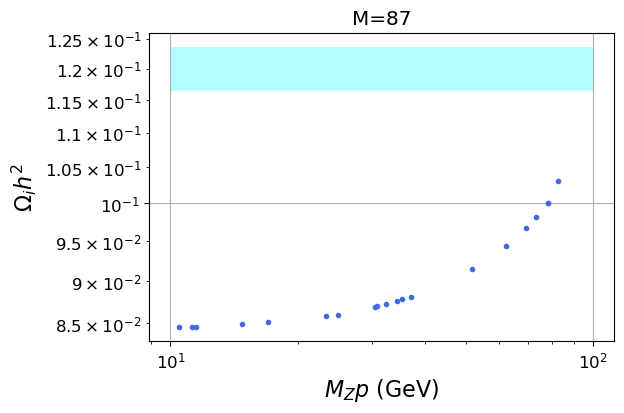

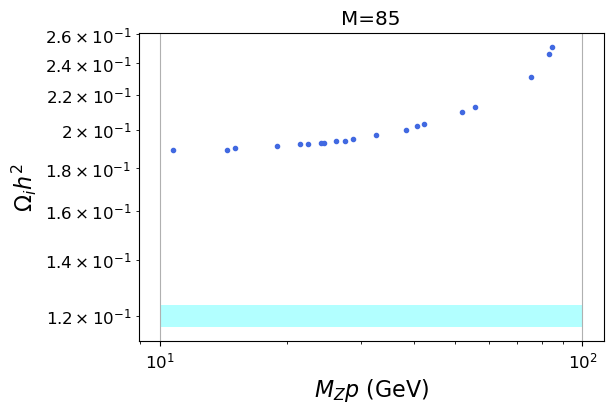

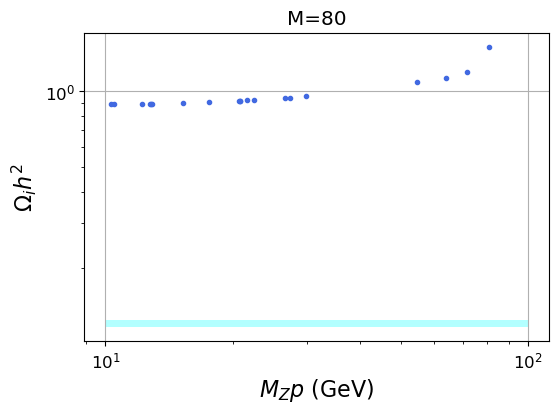

In [95]:
plt.figure(figsize=(6,4))

plt.loglog(xd.MZp, (xd.Omega1+xd.Omega2), color='royalblue', marker='.', ms=6, linestyle='',label='')
#plt.plot(xd.mh2, (xd.Omega1),color='red', marker='.',ms=1,linestyle='',label='')

n=np.linspace(1e1,1e2,10)
plt.fill_between(n,Omega_min,Omega_max,facecolor='cyan',alpha=0.3,label='')

plt.xlabel(r'$M_Zp$ (GeV)',size=16)
plt.ylabel(r'$\Omega_i h^2$',size=16)
plt.title('M=80')
#plt.legend()
plt.grid()

#plt.ylim(Omega_min,Omega_max)
#plt.ylim(1e-3,0.13)
#plt.xlim(10, 125)
#plt.tight_layout()

plt.show()

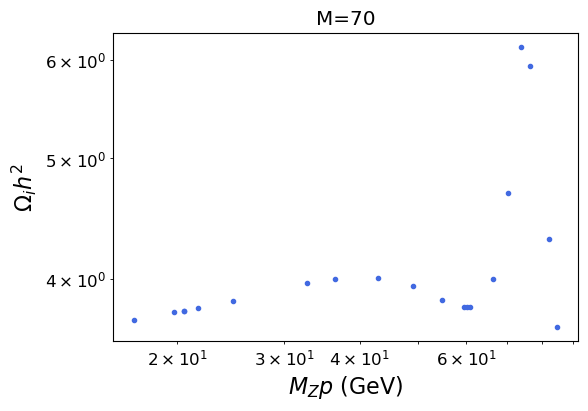